# Fig. 9(c): Comparison of Frequency Change for Various External Fields

This notebook reproduces Fig. 9(c) in the paper, which shows the frequency change $\Delta f$ for the first eigenmode (N = 1) for three strengths of the out-of-plane field: 0 Tesla, 0.1 Tesla and 1 Tesla.

In [1]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib._png import read_png
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%matplotlib inline
plt.style.use('style_sheets/fig9c.mplstyle')

Read the data frame containing the eigenmode data and filter out the parameter values relevant for this plot.

In [2]:
df = pd.read_csv('../data/eigenmode_info_data_frame.csv')
df = df.query('(has_particle == True) and (x == 0) and (y == 0) and '
              '(d_particle == 20) and (Ms_particle == 1e6) and (N == 1)')
df = df.sort_values('d')

Define helper function to plot $\Delta f$ vs. particle separation for a single value of the external field strength.

In [3]:
def plot_freq_change_vs_particle_distance_for_field_strength(ax, Hz, H_ext_descr, color):
    """
    Plot frequency change vs. particle distance for a single field strength `Hz`.
    """
    df_filtered = df.query('Hz == {Hz} and N == 1'.format(Hz=Hz))
    d_vals = df_filtered['d']
    freq_diffs = df_filtered['freq_diff'] * 1e3  # frequency change in MHz
    ax.plot(d_vals, freq_diffs, color=color, label='H={}'.format(H_ext_descr))

In [4]:
def add_eigenmode_profile(filename):
    imagebox = OffsetImage(read_png(filename), zoom=0.75)
    ab = AnnotationBbox(imagebox,
                        (40, 0.4), xybox=(60, 220), xycoords='data',
                        boxcoords='data', frameon=False)
    ax.add_artist(ab)

Produce the plot for Fig. 9(c).

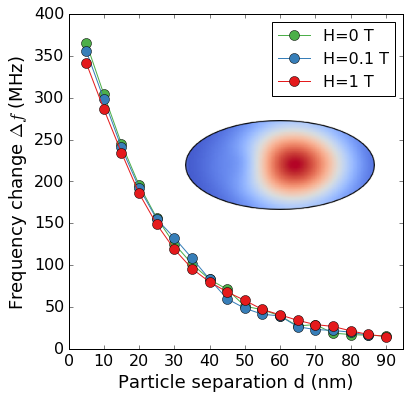

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

for H_z, H_ext_descr, color in [(0,    '0 T',   '#4DAF4A'),
                                (8e4,  '0.1 T', '#377EB8'),
                                (80e4, '1 T',   '#E41A1C')
                               ]:
    plot_freq_change_vs_particle_distance_for_field_strength(ax, H_z, H_ext_descr, color)

add_eigenmode_profile("../images/eigenmode_profile_with_particle_at_x_neg30_y_0_d_5.png")

ax.set_xlim(0, 95)
ax.set_xticks(range(0, 100, 10))
ax.set_xlabel('Particle separation d (nm)')
ax.set_ylabel(r'Frequency change $\Delta f$ (MHz)')
ax.legend(numpoints=1, loc='upper right')